In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def get_binary_data(csv_file):
    data = pd.read_csv(csv_file)
    data = data.loc[data["user_action"].isin([1,0]), :]
    
    features = data[data.columns[:-1]]
    predictor = data[data.columns[-1]]
    
    features.n_products_viewed = (features.n_products_viewed - features.n_products_viewed.mean())/features.n_products_viewed.std()
    features.visit_duration = (features.visit_duration - features.visit_duration.mean())/features.visit_duration.std()

    N, D = features.shape
    features
    
    features["zeros1"] = np.zeros(N)
    features["zeros2"] = np.zeros(N)
    features["zeros3"] = np.zeros(N)
    
    for n in range(N):
        t = int(features.iloc[n, D-1])
        features.iloc[n, t+D-1] = 1
    
    features = features.drop("time_of_day", axis = 1)
    return features, predictor
    
X, Y = get_binary_data("./ecommerce_data.csv")

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1)

## Scikitlearn results
model = LogisticRegression()
model.fit(Xtrain, Ytrain)

predicted = model.predict(Xtest)

def classification_rate(actual, predicted):
    return np.mean(actual==predicted)

print(classification_rate(Ytest, predicted))

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.95


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def classification_rate(actual, predicted):
    return np.mean(actual==predicted)
    
def cross_entropy(actual, predicted):
    return -np.mean((actual)*np.log(predicted)+
                    (1-actual)*np.log(1-predicted))
 
def gradient_descent(Xtrain, Ytrain, learning_rate):
    train = []
    weights = np.random.randn(Xtrain.shape[1])
    
    for x in range(10000):
        predictions = sigmoid(Xtrain.dot(weights))
        if x%100 == 0:
            cost = cross_entropy(Ytrain, predictions)
            costs.append(cost)
        
        partial_diff = Xtrain.T.dot(predictions-Ytrain)/Xtrain.shape[0]
        
        for index in range(len(weights)):
            weights[index] = weights[index] - learning_rate*(partial_diff[index])
    
    x_axis = np.linspace(0,10000, 100)
    y_axis = costs
    plt.plot(x_axis, y_axis)
    return weights

def fit(Xtrain, Ytrain, learning_rate=0.01):
    costs = []
    Xtrain["ones"] = np.ones(Xtrain.shape[0])
    weights = gradient_descent(Xtrain, Ytrain, learning_rate)
    
    return weights

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.95


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


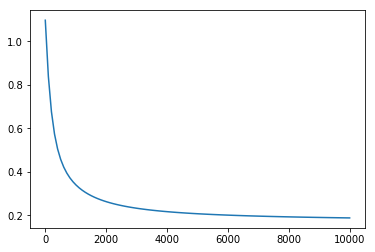

In [101]:
weights = fit(Xtrain, Ytrain)
Xtest["ones"] = np.ones(Xtest.shape[0])
predictions = Xtest.dot(weights)
predictions = np.round(sigmoid(predictions))

print(classification_rate(Ytest, predictions))

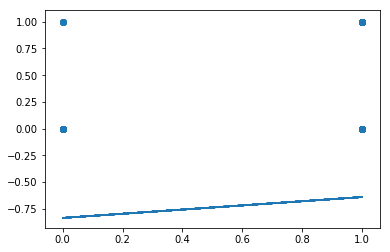

In [105]:
X_axis = Xtest[Xtest.columns[0]]
Y_axis = Ytest

plt.scatter(X_axis, Y_axis)

Y_line = weights[0]*X_axis + weights[-1]
plt.plot(X_axis, Y_line)